## Problem Statement

Employee attrition is a growing concern that affects a company’s stability, productivity, and culture. When talented employees leave, it leads to increased recruitment costs and loss of valuable experience. Often, the reasons behind their departure remain unclear until it's too late. This project aims to analyze HR data to identify key factors driving attrition. The goal is to help organizations take proactive steps to retain talent and build a stronger, more supportive workplace.


## Objective

1.Understand Current Turnover Trends: Get a clear picture of how many employees are leaving the company and explore how attrition varies across different groups—like age, gender, education level, departments, and job roles.

2.Identify What’s Driving People to Leave: Dive deep into the factors that impact an employee’s decision to stay or leave, such as job satisfaction, work-life balance, salary, and benefits. By spotting patterns and connections, we aim to uncover what truly influences turnover and how to address it effectively.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Exploratory Data Analysis

### Shape of the Dataset

In [3]:
df.shape

(1470, 35)

#### Observation:

The dataset contains 1,470 employee records with 35 features, including demographic, job-related, satisfaction, and performance metrics, used to analyze and predict employee attrition.


### Columns

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Basic Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Observation:

All columns have correct data types, indicating the dataset is properly formatted and ready for analysis.


### Statistical Summary 

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Observation:

The summary statistics indicate that all values fall within reasonable ranges, suggesting no obvious outliers in the dataset.


### Checking for Null Values

In [7]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Observation:

The dataset has no missing values, ensuring completeness and reliability for analysis and modeling.


### Checking for the duplicates

In [8]:
df.duplicated().sum()

0

#### Observation:

The dataset contains no duplicate records, ensuring data uniqueness and integrity.


### Data Preprocessing

In [9]:
# Drop unnecessary columns
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

# Convert target variable
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


### Data Visualization

#### Attrition Count

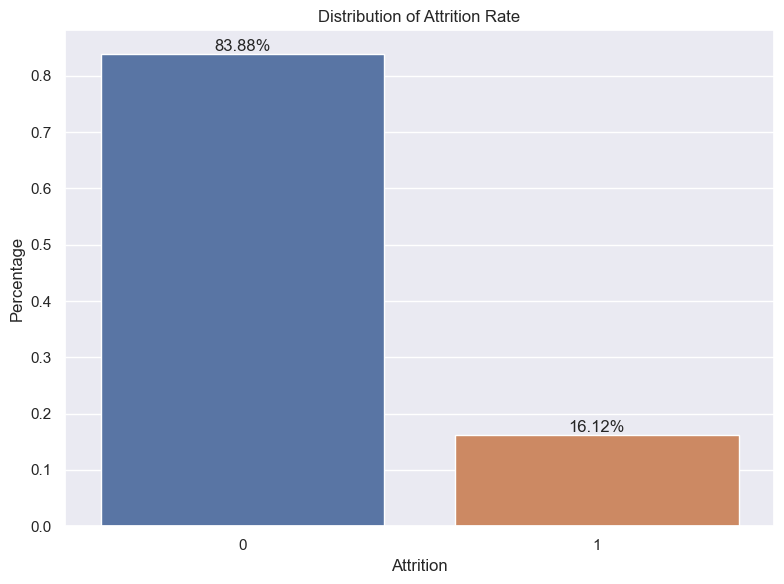

In [10]:
attrition_rate = df['Attrition'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=attrition_rate.index, y=attrition_rate.values)

for bar, percentage in zip(ax.patches, attrition_rate.values):
    ax.annotate(f'{percentage * 100:.2f}%', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom')

plt.title('Distribution of Attrition Rate')
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


#### Observation:

The analysis indicates that the company's attrition rate stands at 16.12%. 
This suggests that approximately 16.12% of employees left the organization during the analyzed period.

### Age Distribution of Employees

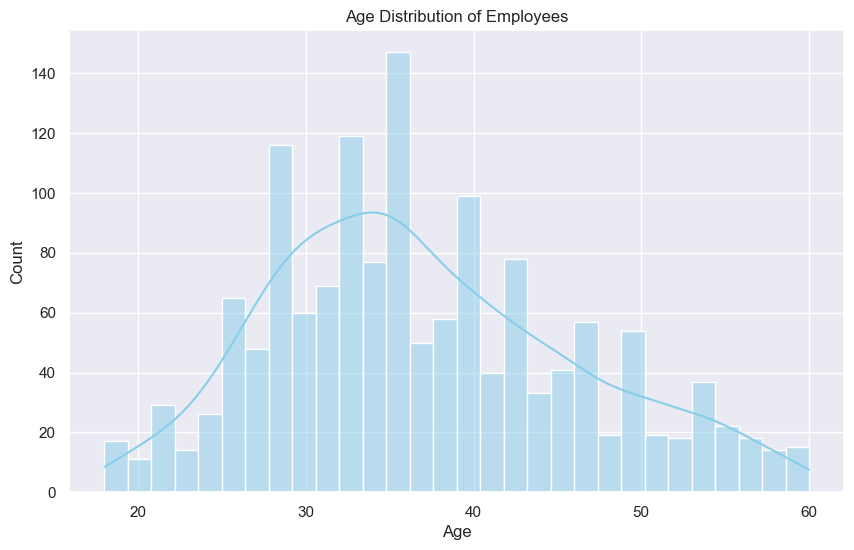

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


#### Observation:

A significant proportion of employees are aged between 30 and 40, indicating that the workforce is primarily composed of mid-career professionals who may be seeking stability, career growth, or work-life balance.

### Attrition by Department

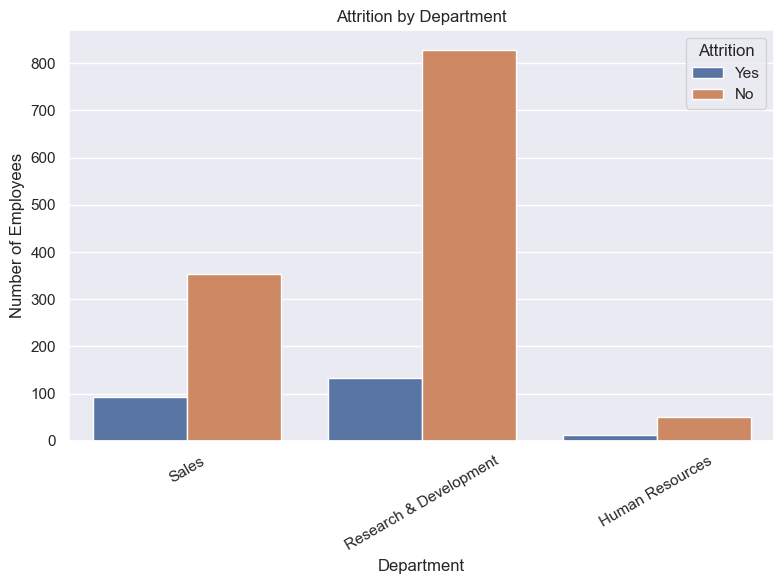

In [12]:
original_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

plt.figure(figsize=(8, 6))
sns.countplot(x='Department', hue='Attrition', data=original_df)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



#### Observation: 
The Research & Development department has the highest number of total and exiting employees.

### Monthly Income Distribution by Attrition

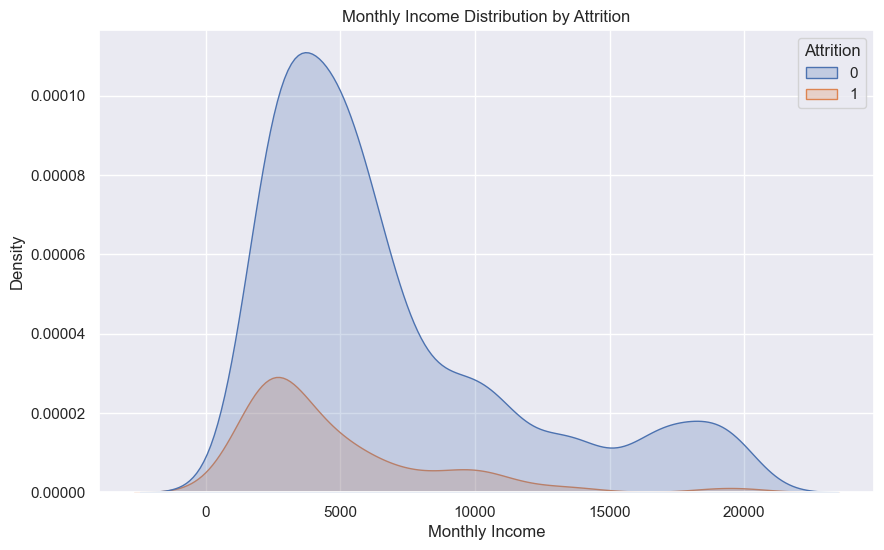

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyIncome', hue='Attrition', fill=True)
plt.title('Monthly Income Distribution by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.show()


#### Observation: 
Employees with lower monthly income show a noticeably higher density of attrition, indicating a strong link between lower pay and likelihood of leaving the company.


### Attrition by Job Role

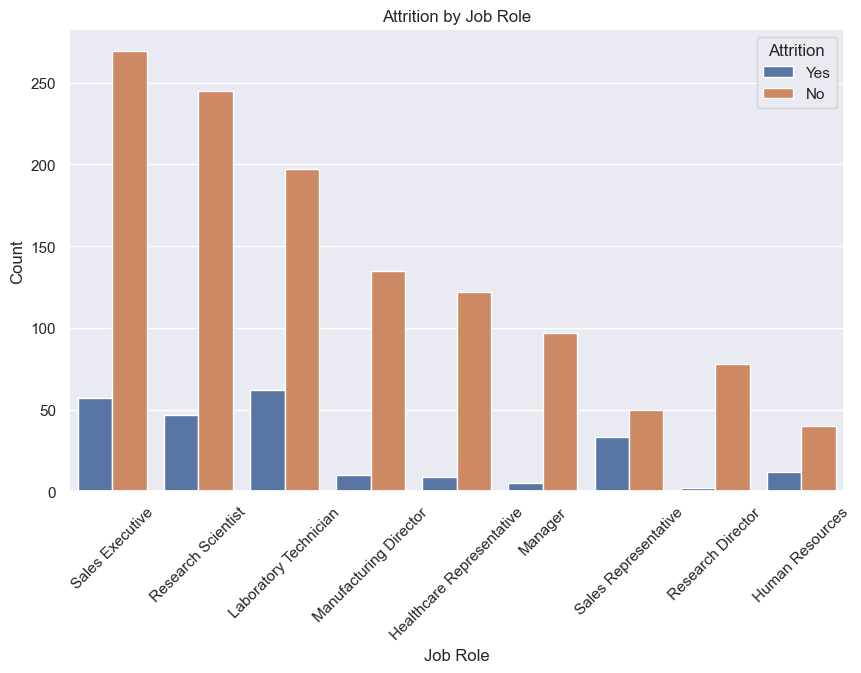

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=original_df, x='JobRole', hue='Attrition')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Observation:
Sales Executives and Laboratory Technicians show higher attrition counts.

### Heatmap of Correlation

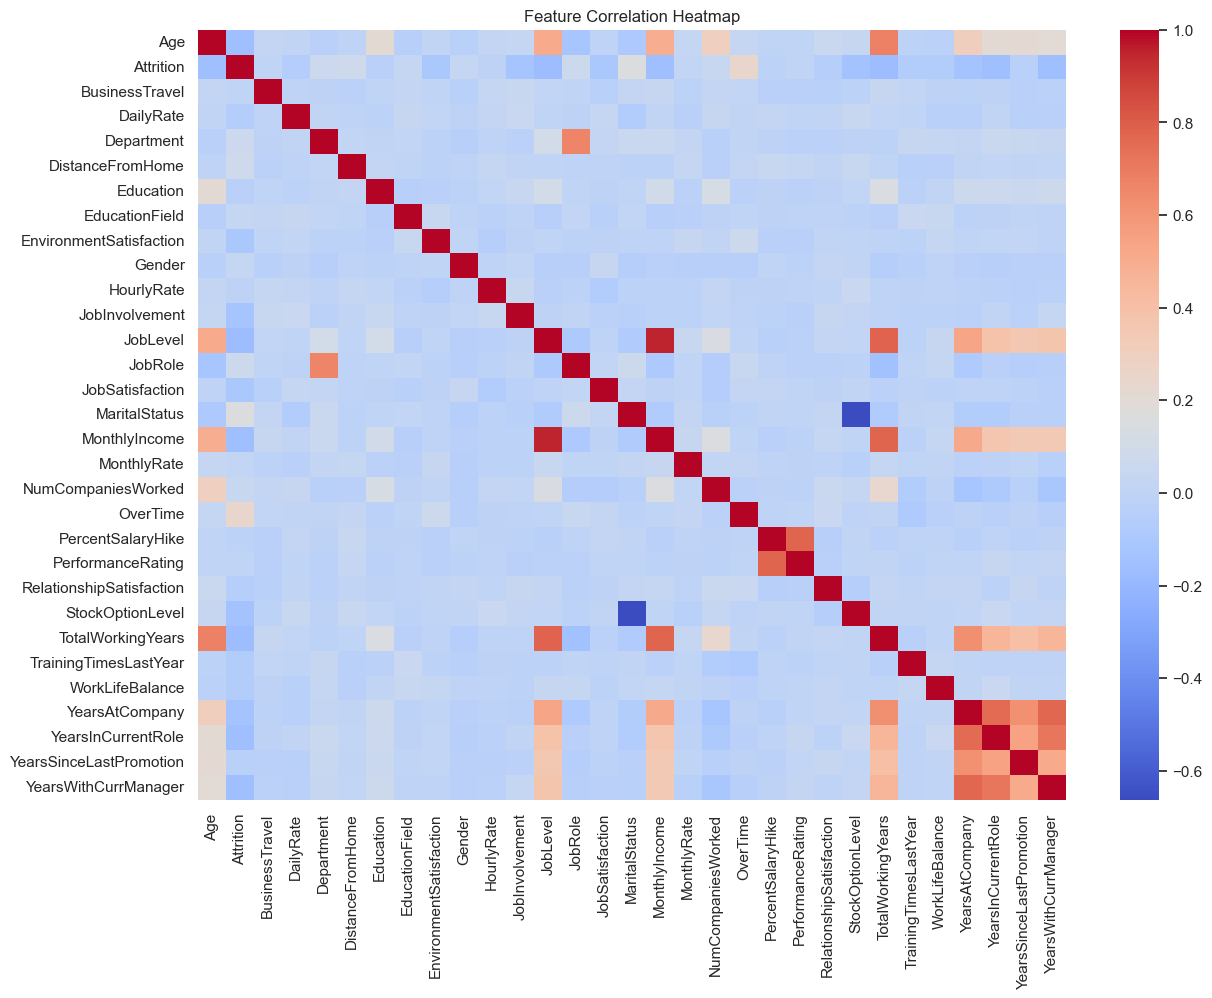

In [15]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


### Observation:
Attrition is negatively correlated with Monthly Income and Total Working Years.

### Overtime vs Attrition

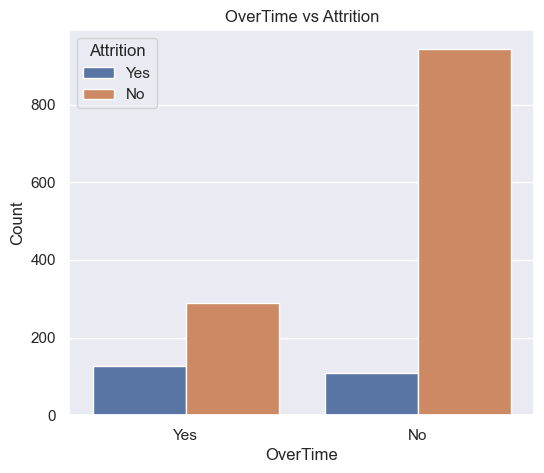

In [16]:
plt.figure(figsize=(6, 5))
sns.countplot(x='OverTime', hue='Attrition', data=original_df)
plt.title('OverTime vs Attrition')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.show()


#### Observation:
Employees who regularly work overtime exhibit a significantly higher attrition rate compared to those with standard working hours.


### Years at Company vs Attrition

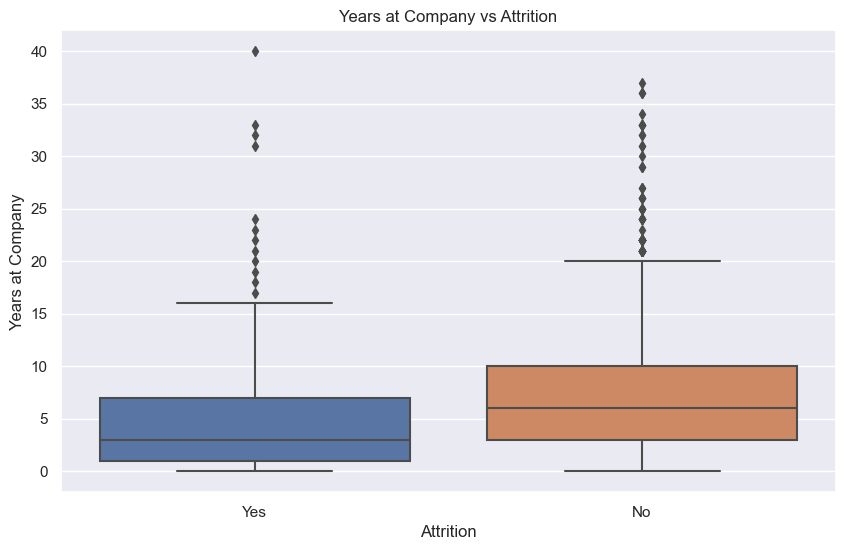

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=original_df)
plt.title('Years at Company vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

#### Observation:
Observation: Employees who left typically had fewer years at the company.

### Job Satisfaction vs Attrition

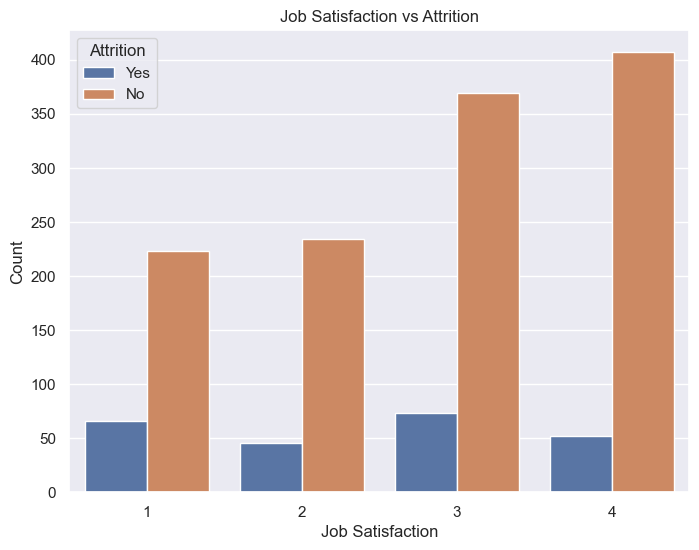

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=original_df)
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()


### Observation: 

Employees with lower job satisfaction are more likely to leave the company compared to those with higher job satisfaction.


### Gender Distribution of Employees

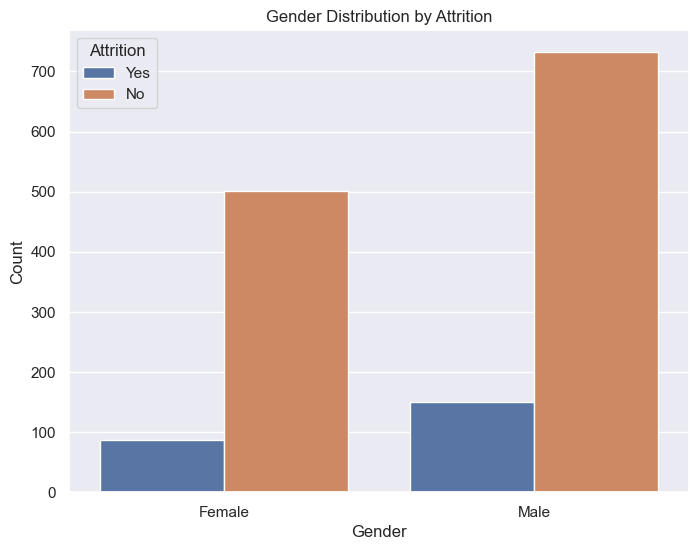

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Attrition', data=original_df)
plt.title('Gender Distribution by Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#### Observation: 

Male employees have a higher attrition rate than female employees, indicating potential gender-based differences in retention factors.


### Distribution of Years in Current Role by Attrition

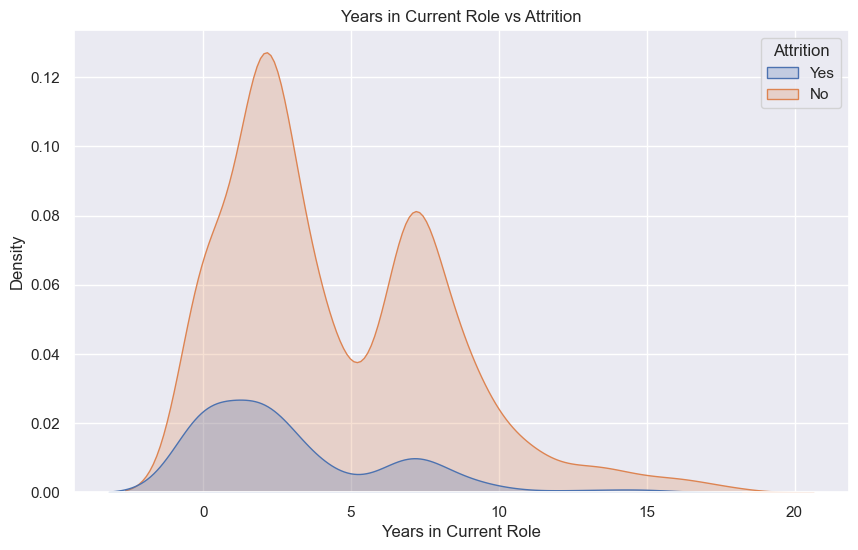

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=original_df, x='YearsInCurrentRole', hue='Attrition', fill=True)
plt.title('Years in Current Role vs Attrition')
plt.xlabel('Years in Current Role')
plt.ylabel('Density')
plt.show()


#### Observation: 

Employees who stay longer in their current role tend to have lower attrition rates compared to those who switch roles more frequently.

### Distance from Home vs Attrition

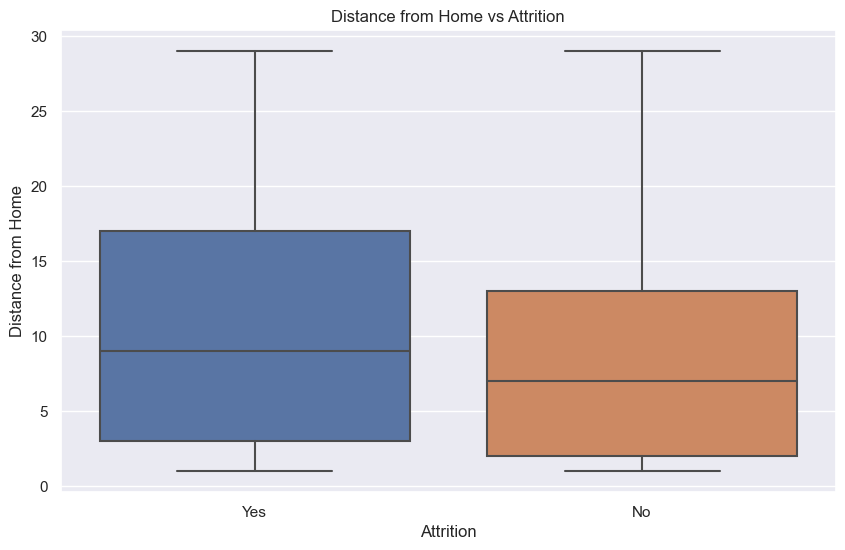

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=original_df)
plt.title('Distance from Home vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home')
plt.show()

#### Observation: 
Employees who live farther from the company tend to have a higher attrition rate, suggesting that long commute times may influence their decision to leave.

### Years Since Last Promotion vs Attrition 

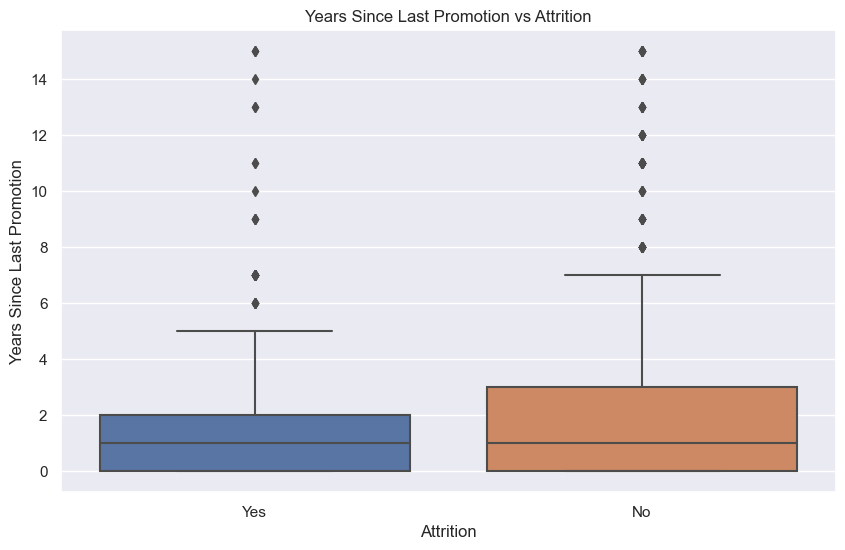

In [22]:
df['AttritionLabel'] = df['Attrition'].map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(10, 6))
sns.boxplot(x='AttritionLabel', y='YearsSinceLastPromotion', data=df)
plt.title('Years Since Last Promotion vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years Since Last Promotion')
plt.show()

df.drop('AttritionLabel', axis=1, inplace=True)



#### Observation:

Employees who haven't been promoted for several years are more likely to leave, highlighting the importance of career progression in retention.

### PercentSalaryHike vs Attrition

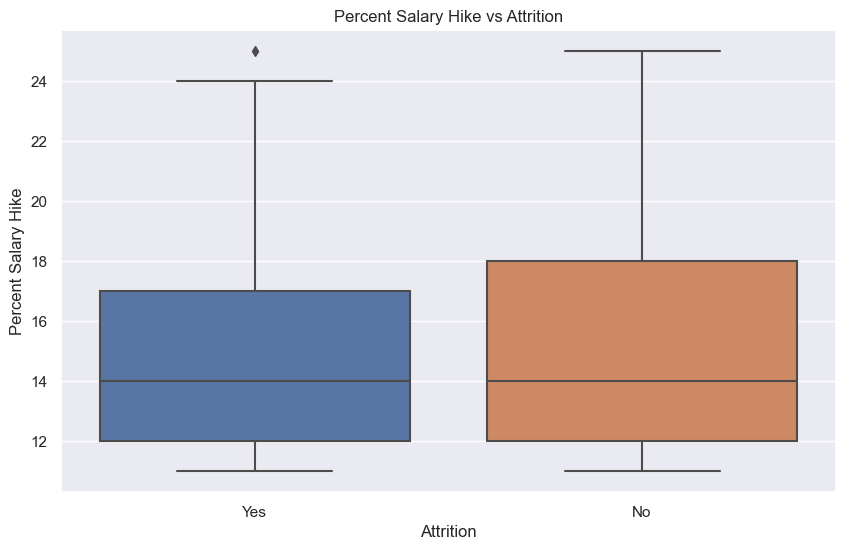

In [23]:
df['AttritionLabel'] = df['Attrition'].map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(10, 6))
sns.boxplot(x='AttritionLabel', y='PercentSalaryHike', data=df)
plt.title('Percent Salary Hike vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Percent Salary Hike')
plt.show()

df.drop('AttritionLabel', axis=1, inplace=True)


#### Observation: 
Employees with lower salary hikes tend to have a slightly higher attrition rate, indicating the impact of compensation on retention.

In [24]:
### Work-Life Balance vs Attrition

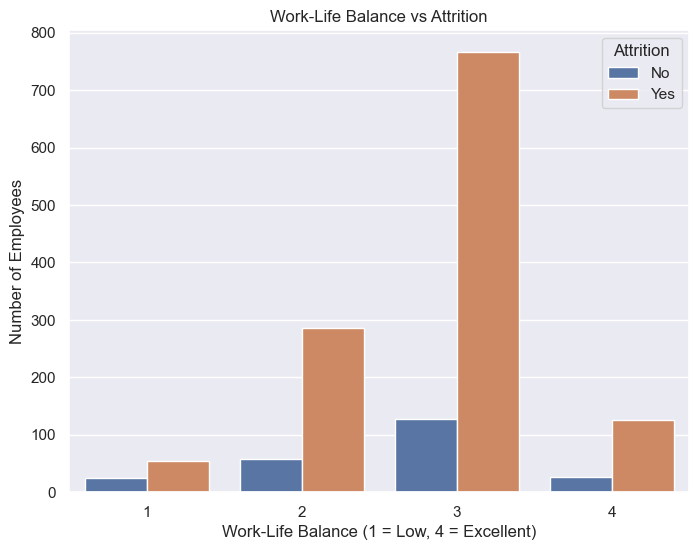

In [25]:

plt.figure(figsize=(8, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=original_df)
plt.title('Work-Life Balance vs Attrition')
plt.xlabel('Work-Life Balance')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()


### Split data into Independent and Dependent Variable

In [26]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

### Split data into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Model Training

In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = rf_model.predict(X_test)

### Confusion_matrix

In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[242   5]
 [ 41   6]]


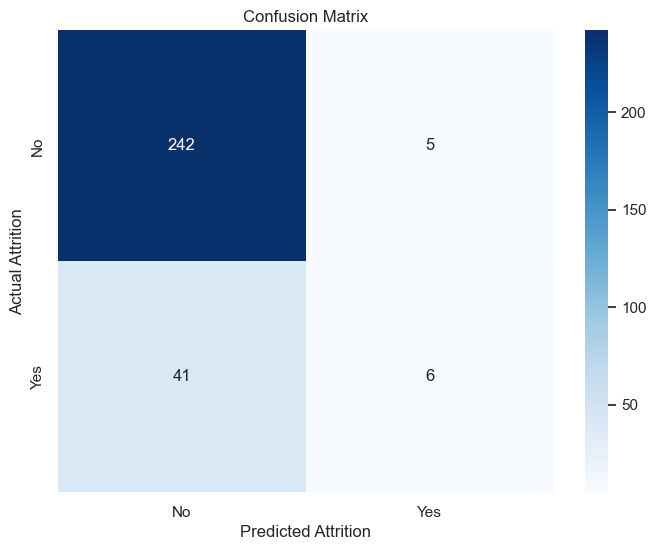

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], 
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Attrition')
plt.ylabel('Actual Attrition')
plt.title('Confusion Matrix')
plt.show()


### Classification_report

In [32]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.55      0.13      0.21        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.56       294
weighted avg       0.81      0.84      0.80       294



### accuracy_score

In [33]:
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")


Accuracy Score: 0.84


### Feature Importance Plot

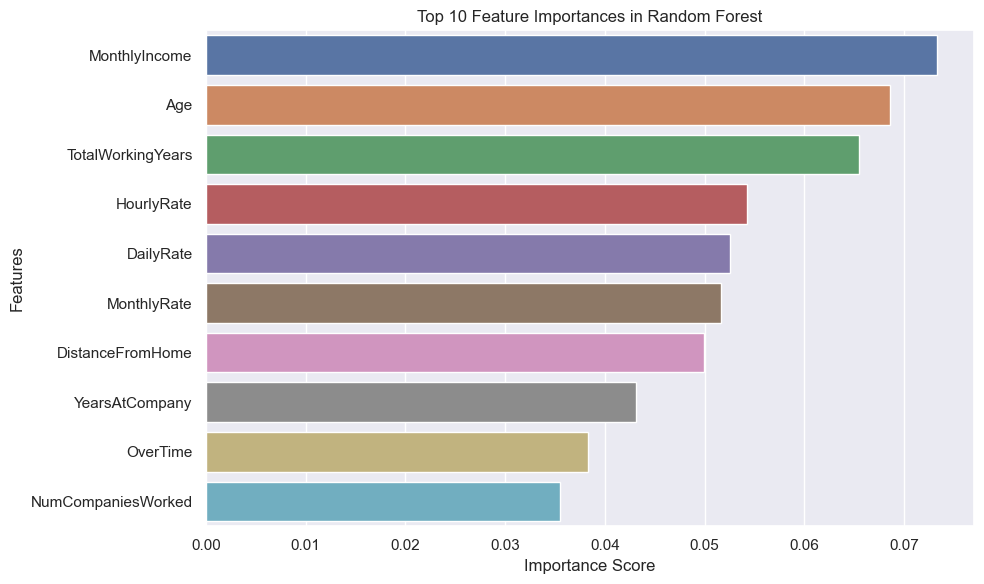

In [34]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title('Top 10 Feature Importances in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# Conclusion

### Key Insights from EDA

Attrition Rate: Approximately 16.1% of employees have left the company.

Gender & Attrition: Male employees show a higher attrition rate than females.

OverTime: Employees working overtime are significantly more likely to leave.

Distance from Home: Employees who live further away tend to have higher attrition.

Promotion & Salary Hike: Lack of recent promotions and smaller salary hikes correlate with higher attrition.

Job Satisfaction: Employees with lower job satisfaction are more likely to leave.

### Model Performance (Random Forest Classifier):

The Random Forest model showed strong performance with 84% accuracy, especially in spotting employees likely to stay. Like many models, it found predicting who would leave more challenging due to fewer examples. Key reasons behind attrition included low income, frequent overtime, certain roles, and younger age. These findings can help HR teams take focused steps to retain valuable talent.


In [36]:
# Save the model
import pickle
with open('random_forest_attrition_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


In [37]:
# Load the model
with open('random_forest_attrition_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


--THANK YOU